In [878]:
import pandas as pd
import numpy as np

In [879]:
data = pd.read_csv('Salary_Data_Based_country_and_race.csv') #Lectura de los datos 

In [880]:
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [881]:
data.columns.values #Valores de las columnas 

array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'], dtype=object)

## Cuantos valores nulos hay en cada columna 
Como son pocos podemos eliminarlos 

In [882]:
def null_values(data,lista): #Funcion para saber cuantos valores nulos hay en cada columna
    null_val = []
    for item in lista:

        null_val.append(pd.isnull(data[item]).values.ravel().sum()) 
        #Agrega a una lista los valores nulos de cada columna

    return null_val

lista = np.array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'])
#Lista con los nombres de cada columna

valores_nulos = null_values(data,lista)
print('Los valores nulos en cada columna son: ', valores_nulos)

Los valores nulos en cada columna son:  [0, 2, 2, 3, 2, 3, 5, 0, 0]


Los datos de la caracteristica 'Job Title' son muchos pero una gran parte de cada variable se repite solo una vez o muy pocas veces. 

In [883]:
list_jt = []
print(pd.get_dummies(data['Job Title']).columns.values.shape)
for job in pd.get_dummies(data['Job Title']).columns.values:
    list_jt.append(np.count_nonzero(data['Job Title'] == job))
list_jt = pd.DataFrame({'Job': list_jt})
print(list_jt)


(193,)
     Job
0      1
1      1
2      2
3    244
4      2
..   ...
188    1
189    1
190    1
191    1
192   87

[193 rows x 1 columns]


Hacemos que las variables que tienen menos de 15 datos sean NaN para eliminarlos despues ya que estos con pocos datos serian muy dificiles de predecir por el algoritmo.

In [884]:
job2 = data['Job Title'].copy()

Hacemos que los trabajos que se repiten menos de 15 veces sean NaN

In [885]:
for i in range(list_jt.shape[0]):
    if list_jt.iloc[i].item() <= 15:
        data['Job Title'] = data['Job Title'].replace(pd.get_dummies(job2).columns.values[i], None)

# Creamos una nueva columna 
En la caracteristica 'Job Title' un mismo trabajo se repite hasta 3 veces con el prefijo 'Junior', 'Senior' o sin el. Aqui clasificaremos este prefijo. 

In [886]:
data['Job class'] = data['Job Title']
job = pd.get_dummies(data['Job class']).columns.values
for i in job:
    if 'Senior' in i:
        data['Job class'] = data['Job class'].replace(i, 1)
    elif 'Junior' in i:
        data['Job class'] = data['Job class'].replace(i, -1)
    else:
        data['Job class'] = data['Job class'].replace(i, 0)
data['Job class']


0       0.0
1       0.0
2       NaN
3       0.0
4       NaN
       ... 
6699    0.0
6700    0.0
6701    0.0
6702    0.0
6703    0.0
Name: Job class, Length: 6704, dtype: float64

In [887]:
x_1 = []
x_2 = []
x_3 = []
for i in job:
    if 'Senior' in i:
        x_1.append(i)
    elif 'Junior' in i:
        x_2.append(i)
    else:
        x_3.append(i)


In [888]:
data_new = data.copy()

Habia varios valores con el mismo significado en la caracteristica 'Education Level', asi que en esta linea lo resolvemos. Tambien se ordenaron para que vayan de menor a mayor grado academico

In [889]:
print(pd.get_dummies(data_new['Education Level']).columns.values)
data_new['Education Level'] = data_new['Education Level'].replace(['phD'], ['PhD'])
data_new['Education Level'] = data_new['Education Level'].replace(["Bachelor's Degree"], ["Bachelor's"])
data_new['Education Level'] = data_new['Education Level'].replace(["Master's Degree"], ["Master's"])
data_new['Education Level'] = data_new['Education Level'].replace(["High School"], ["1High School"])
print(pd.get_dummies(data_new['Education Level']).columns.values)

["Bachelor's" "Bachelor's Degree" 'High School' "Master's"
 "Master's Degree" 'PhD' 'phD']
['1High School' "Bachelor's" "Master's" 'PhD']


## Cambiar strings por numeros 

In [890]:

def change_values(data1):
#Funcion para cambiar los valores de las columnas por numeros 

    columnas = []
    for item in data1.columns.values:
        if data1[item].dtypes == 'object':
            columnas.append(item)
    #Esta parte crea una lista con valores que no sean floats o integer
            
    for item in columnas:
        valores_columnas = pd.get_dummies(data1[item]).columns.values #Crea una lista cada valor distinto en cada columna
        x = [i for i in range(valores_columnas.shape[0])] #Crea una lista de numeros del 0 hasta la longitud de valores_columnas
        data1[item] = data1[item].replace(valores_columnas, x) #Intercambia los valores
    
    return data1

In [891]:
change_values(data_new)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class
0,0,32.0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0
1,1,28.0,0.0,2.0,2.0,3.0,65000.0,4,5,0.0
2,2,45.0,1.0,3.0,NaN,15.0,150000.0,1,9,NaN
3,3,36.0,0.0,1.0,36.0,7.0,60000.0,4,5,0.0
4,4,52.0,1.0,2.0,NaN,20.0,200000.0,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,0.0,3.0,7.0,20.0,200000.0,3,7,0.0
6700,6700,32.0,1.0,0.0,36.0,3.0,50000.0,0,2,0.0
6701,6701,30.0,0.0,1.0,9.0,4.0,55000.0,2,4,0.0
6702,6702,46.0,1.0,2.0,28.0,14.0,140000.0,2,6,0.0


In [892]:
pd.get_dummies(data_new['Gender']).columns.values

array([0., 1., 2.])

La caracteristica 'Gender' tiene 3 valores, lo ideal seria tener dos asi que para que sea un cambio valido necesitamos que sean pocos datos con este valor 

In [893]:
print(pd.get_dummies(data['Gender']).columns.values)
print('El numero de veces que aparece Other es', np.count_nonzero(data['Gender'] == 'Other'))
data_new['Gender'] = data_new['Gender'].replace(2., None) #La variable Other fue ajustada tal que Other == 2., y aqui se reemplaza por NaN



['Female' 'Male' 'Other']
El numero de veces que aparece Other es 14


Eliminamos los datos que no necesitamos o podemos prescindir

In [894]:
data2 = data_new.copy()
data2 = data2.dropna(axis=0,how="any") #Elimina todos los NaN
data2 = data2.drop('Unnamed: 0', axis = 1) #Elimina la primera columna 
data2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class
0,32.0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0
1,28.0,0.0,2.0,2.0,3.0,65000.0,4,5,0.0
3,36.0,0.0,1.0,36.0,7.0,60000.0,4,5,0.0
5,29.0,1.0,1.0,25.0,2.0,55000.0,4,5,0.0
6,42.0,0.0,2.0,31.0,12.0,120000.0,4,1,0.0
...,...,...,...,...,...,...,...,...,...
6699,49.0,0.0,3.0,7.0,20.0,200000.0,3,7,0.0
6700,32.0,1.0,0.0,36.0,3.0,50000.0,0,2,0.0
6701,30.0,0.0,1.0,9.0,4.0,55000.0,2,4,0.0
6702,46.0,1.0,2.0,28.0,14.0,140000.0,2,6,0.0


In [895]:
data2.describe()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,33.489995,1.634315,26.028517,8.035844,116520.845911,2.011817,4.879628,0.051363
std,7.591029,0.884813,17.530873,6.004359,52816.002675,1.418670,3.386865,0.453869
min,21.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,-1.000000
25%,28.000000,1.000000,10.000000,3.000000,70000.000000,1.000000,1.000000,0.000000
50%,32.000000,1.000000,28.000000,7.000000,119918.000000,2.000000,5.000000,0.000000
75%,38.000000,2.000000,45.000000,12.000000,160000.000000,3.000000,9.000000,0.000000
max,62.000000,3.000000,51.000000,34.000000,250000.000000,4.000000,9.000000,1.000000


In [896]:
import matplotlib.pyplot as plt 
import seaborn as sns


## Vista general de los datos 
Mediante seaborn hacemos un histograma para cada una de las caracteristicas para asi observar su forma, su distribucion y si hay algo que sea de relevancia.  \\ 

Las variables 'Age', 'Salary' y 'Years of Experience' son las unicas que aparentan seguir una distribucion. Las otras solo conforman un conjunto de datos cuantitativos que no siguen ninguna estructura estadistica. 


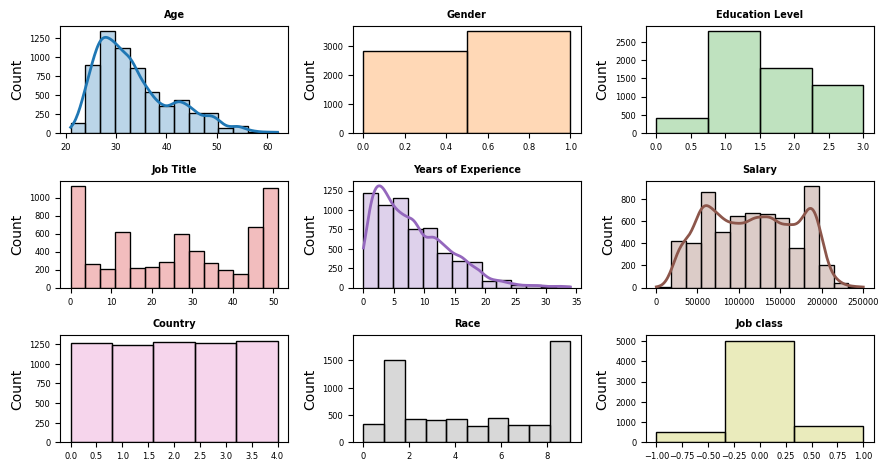

In [897]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(data2):
    if pd.get_dummies(data2[colum]).columns.values.shape[0] <= 12:
        num_bins = pd.get_dummies(data2[colum]).columns.values.shape[0] 
    else:
        num_bins = 14
    with_curve = ['Salary', 'Age', 'Years of Experience']
    if any(colum == var for var in with_curve):
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            kde      = True,
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws = {'linewidth': 2},
            alpha    = 0.3,
            ax       = axes[i]
        )
    else:
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            alpha    = 0.3,
            ax       = axes[i]
        )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)

## Estadistica sobre los datos 

In [898]:
def kurtosis(data): #Funcion para obtener la kurtosis
    
    kurtosis = sum((x - np.mean(data)) ** 4 for x in data) / (len(data)* np.sqrt(np.var(data)) ** 4)

    return kurtosis


In [899]:
import scipy.stats as st
print("Estadistica de Salary:", "media", np.mean(data2['Salary']), "desviacion estandar", np.sqrt(np.var(data2['Salary'])) , "asimetría", st.skew(data2['Salary']),"curtosis", kurtosis(data2['Salary'])) 
print("Estadistica de age:", "media", np.mean(data2['Age']), "desviacion estandar", np.sqrt(np.var(data2['Age'])) , "asimetría", st.skew(data2['Age']),"curtosis", kurtosis(data2['Age'])) 
print("Estadistica de Years of Experience:", "media", np.mean(data2['Years of Experience']), "desviacion estandar", np.sqrt(np.var(data2['Years of Experience'])) , "asimetría", st.skew(data2['Years of Experience']),"curtosis", kurtosis(data2['Years of Experience'])) 


Estadistica de Salary: media 116520.84591145423 desviacion estandar 52811.841805532415 asimetría 0.02734916156260092 curtosis 1.8256383493261903
Estadistica de age: media 33.48999527335749 desviacion estandar 7.590430761974806 asimetría 0.9397648509577311 curtosis 3.280116054534742
Estadistica de Years of Experience: media 8.035843705687727 desviacion estandar 6.003886346487053 asimetría 0.9890519176688246 curtosis 3.824103606125005


## Mejor distribucion para cada variable 

In [900]:
from fitter import Fitter 
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic'] 
#Atributo
fitter_yoe = Fitter(data2['Years of Experience'], distributions= distribuciones)
fitter_yoe.fit()
fitter_yoe.get_best(method = 'sumsquare_error')

fitter_age = Fitter(data2['Age'], distributions= distribuciones)
fitter_age.fit()
fitter_age.get_best(method = 'sumsquare_error')

fitter_salary = Fitter(data2['Salary'], distributions= distribuciones)
fitter_salary.fit()
fitter_salary.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.295847693448763,
  'b': 2.6447507080529866,
  'loc': -210.54956369289852,
  'scale': 250695.8038694536}}

In [901]:
print('La mejor distribucion para salary es ',  fitter_salary.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para age es ',  fitter_age.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para years of experience es ',  fitter_yoe.get_best(method = 'sumsquare_error') )

La mejor distribucion para salary es  {'beta': {'a': 2.295847693448763, 'b': 2.6447507080529866, 'loc': -210.54956369289852, 'scale': 250695.8038694536}}
La mejor distribucion para age es  {'chi2': {'df': 5.857091394590343, 'loc': 20.5663243365464, 'scale': 2.2065061295243504}}
La mejor distribucion para years of experience es  {'beta': {'a': 1.2599842191822468, 'b': 5.343212033617164, 'loc': -0.06623458933970258, 'scale': 42.420938497441654}}


## Graficas de las distribuciones 

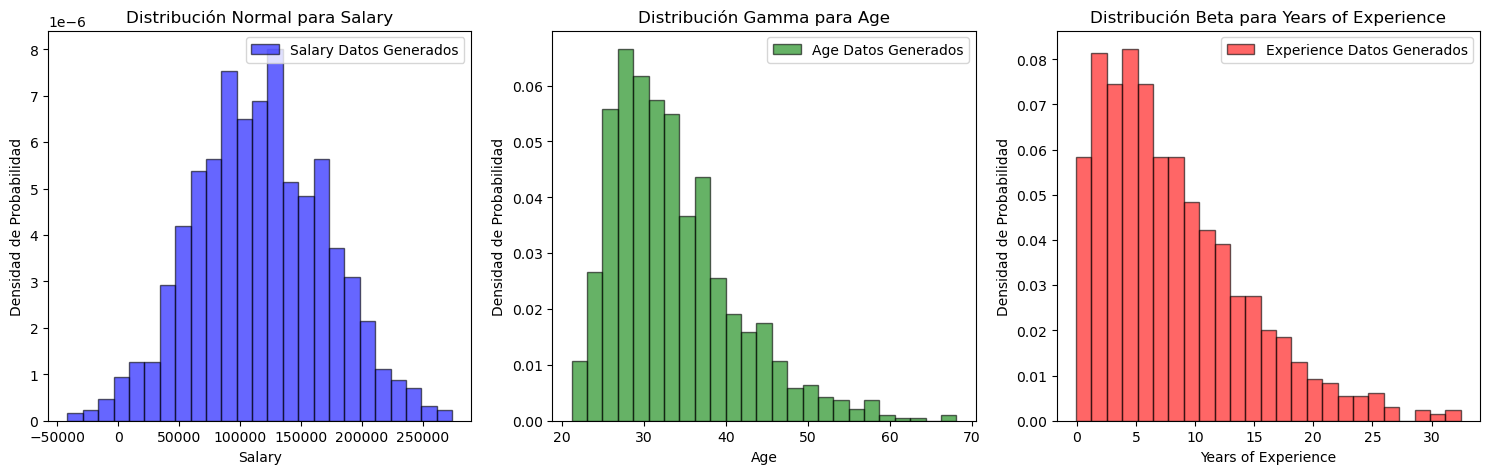

In [902]:
from scipy.stats import norm, gamma, beta

# Parámetros de las distribuciones
params_salary = {'loc': 115307.17519449431, 'scale': 52802.86049319856}
params_age = {'a': 2.959547949456022, 'loc': 20.556502171474314, 'scale': 4.410814069978799}
params_experience = {'a': 1.2454264202304017, 'b': 5.0842070339355026, 'loc': -0.0625690283767105, 'scale': 41.32924411035516}

# Generar datos para las tres distribuciones
datos_salary = np.random.normal(**params_salary, size=1000)
datos_age = gamma.rvs(**params_age, size=1000)
datos_experience = beta.rvs(**params_experience, size=1000)

# Crear subplots para las tres distribuciones
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Trazar histograma y curva de densidad de probabilidad para "salary"
axs[0].hist(datos_salary, bins=25, density=True, alpha=0.6, color='b', label='Salary Datos Generados', edgecolor = 'k')
x_salary = np.linspace(min(datos_salary), max(datos_salary), 500)
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Densidad de Probabilidad')
axs[0].legend()
axs[0].set_title('Distribución Normal para Salary')

# Trazar histograma y curva de densidad de probabilidad para "age"
axs[1].hist(datos_age, bins=25, density=True, alpha=0.6, color='green', label='Age Datos Generados', edgecolor = 'k')
x_age = np.linspace(0, 50, 500)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Densidad de Probabilidad')
axs[1].legend()
axs[1].set_title('Distribución Gamma para Age')

# Trazar histograma y curva de densidad de probabilidad para "years of experience"
axs[2].hist(datos_experience, bins=25, density=True, alpha=0.6, color='red', label='Experience Datos Generados', edgecolor = 'k')
x_experience = np.linspace(0, 1, 1000)
axs[2].set_xlabel('Years of Experience')
axs[2].set_ylabel('Densidad de Probabilidad')
axs[2].legend()
axs[2].set_title('Distribución Beta para Years of Experience')

plt.tight_layout()
plt.show()


## Metodo de filtrado 
Aqui se da el orden de importancia segun el metodo de filtrado. 

In [903]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE


x = data2['Salary']
entrenar = data2.drop(['Salary'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k = 'all').fit(entrenar, x)
score_values = np.sort(seleccionadas.scores_)[::-1]
columnas_ord = np.array(columnas)[np.argsort(seleccionadas.scores_)[::-1]]
columnas_ord
for i in range(len(columnas)):
    print('El valor de ', columnas_ord[i], 'es ', score_values[i])


El valor de  Years of Experience es  68.97246508033115
El valor de  Age es  26.67816136445738
El valor de  Education Level es  18.352114998798612
El valor de  Job class es  12.521374451000488
El valor de  Job Title es  5.611584285125532
El valor de  Gender es  4.363828229719932
El valor de  Race es  0.9791215447017222
El valor de  Country es  0.9739428145673424


## Graficas de correlacion 

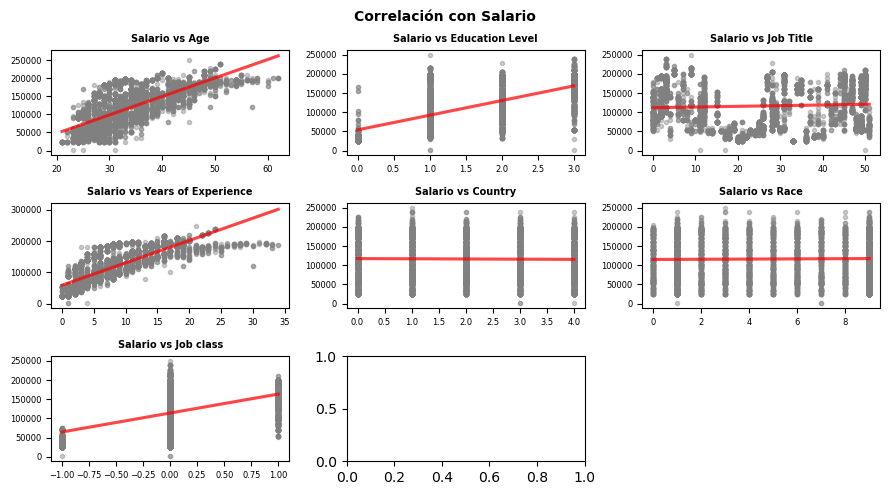

In [904]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas = data2.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Salary') # objetivo

for i, colum in enumerate(columnas):
    sns.regplot(
        x           = data2[colum],
        y           = data2['Salary'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Salario vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Salario', fontsize = 10, fontweight = "bold");

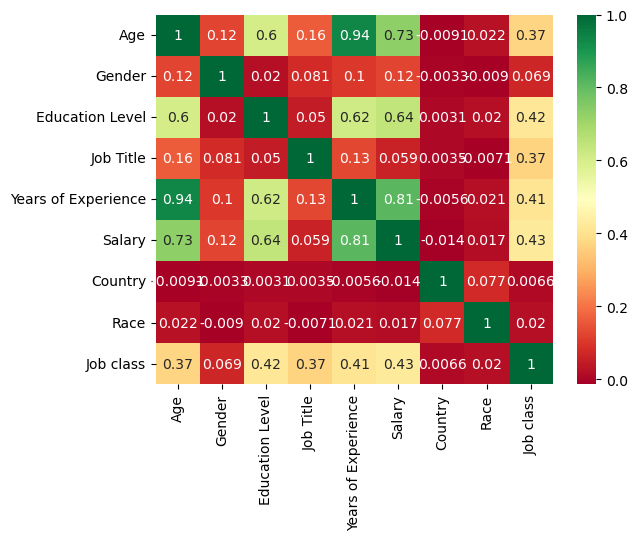

In [905]:
def matrix_corr(data): 
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
#Matriz de correlacion para los datos 

matrix_corr(data2)


Tomaremos la decision de eliminar la columna 'Age' ya que tiene una correlacion muy grande con la caracteristica 'Years of Experience'

In [906]:
data_clean = data2.copy()
data_clean = data_clean.drop(['Age'], axis = 1)
data_clean

,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class
0,1.0,1.0,49.0,5.0,90000.0,3,9,0.0
1,0.0,2.0,2.0,3.0,65000.0,4,5,0.0
3,0.0,1.0,36.0,7.0,60000.0,4,5,0.0
5,1.0,1.0,25.0,2.0,55000.0,4,5,0.0
6,0.0,2.0,31.0,12.0,120000.0,4,1,0.0
...,...,...,...,...,...,...,...,...
6699,0.0,3.0,7.0,20.0,200000.0,3,7,0.0
6700,1.0,0.0,36.0,3.0,50000.0,0,2,0.0
6701,0.0,1.0,9.0,4.0,55000.0,2,4,0.0
6702,1.0,2.0,28.0,14.0,140000.0,2,6,0.0


In [907]:
#Exporta los datos como un archivo csv
mi_dataframe = pd.DataFrame(data_clean)
nombre_archivo = 'datos_limpios.csv'
mi_dataframe.to_csv(nombre_archivo, index=False) 
